시험성적, 공부시간(X) > 통과(0),실패(1)

In [188]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

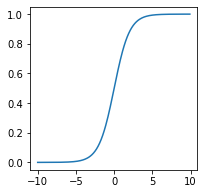

In [217]:
x = np.arange(-10,10, 0.1)
y = 1 / (1+ np.exp(-x))
plt.figure(figsize=(3,3)) #(w,h) 인치
plt.plot(x, y)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


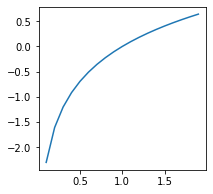

In [222]:
x = np.arange(-1,2,0.1)
y = np.log(x)
plt.figure(figsize=(3,3))
plt.plot(x, y)

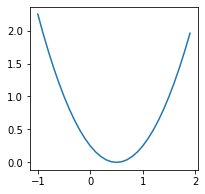

In [281]:
x = np.arange(-1,2,0.1)
y = np.square(x - 0.5)
plt.figure(figsize=(3,3))
plt.plot(x, y)

In [225]:
y = [1, 1, 1]
h = np.array([0.0001, 0.4, 1])
cost_mse = np.square(h - y)
cost_log = -np.log(h)
cost_mse, cost_log

(array([1.  , 0.36, 0.  ]), array([ 9.21,  0.92, -0.  ]))

In [227]:
y = [0, 0, 0]
h = np.array([0.0001, 0.4, 0.99])
cost_mse = np.square(h - y)
cost_log = -np.log(1 - h)
cost_mse, cost_log

(array([1.0e-08, 1.6e-01, 9.8e-01]), array([1.00e-04, 5.11e-01, 4.61e+00]))

In [282]:
from sklearn.datasets import load_breast_cancer

In [234]:
y = [1,1,1,0,0,0]
h = [.9, .8, .7, .3, .2, .9]
y = np.array(y)
h = np.array(h)
h.shape, y.shape

((6,), (6,))

In [235]:
# y==1               y==0
y * -np.log(h) +  (1-y) * -np.log(1 - h)

array([0.11, 0.22, 0.36, 0.36, 0.22, 2.3 ])

In [244]:
x = [1,2,3,5,6,7,8]
y = [1,1,1,0,0,0,0]

In [245]:
x = np.array(x).reshape((-1,1)).astype(np.float32)
y = np.array(y).reshape((-1,1)).astype(np.float32)
type(x), x.shape, x.ndim

(numpy.ndarray, (7, 1), 2)

In [256]:
1e-8

1e-08

In [275]:
w = tf.Variable([[0.5]])
b = tf.Variable(0.0)
z = tf.matmul(x, w) + b 
h = tf.sigmoid(z)
#h = tf.minimum(h, 1 - 1e-8)
#h = tf.maximum(h, 1e-8)
h = tf.clip_by_value(h, 1e-8, 1 - 1e-8) #log(0)이 되지않도록 최대 최소값을 지정해줍니다
#cost = tf.reduce_mean(tf.square(h - y)) #MSE
cost = tf.reduce_mean(y * -tf.log(h) + (1-y) * -tf.log(1 - h)) #CE : Cross Entropy 
maginal_cost = tf.maximum(cost, 0.01) # Y가 정확하지 않을때 
predict = tf.cast(h > 0.5, tf.int32) # 모델과 상관 없습니다, 편의를 위해 사용
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, tf.cast(y,tf.int32)), tf.int32))

In [276]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [277]:
for i in range(200):
    _, acc, co = sess.run([train, accuracy, cost])
    if i%1000==0: print(i, co, acc)

0 2.0234468 0


In [278]:
np.set_printoptions(precision=2)
sess.run(z).reshape([-1])

array([ 1.54,  0.82,  0.09, -1.35, -2.07, -2.79, -3.51], dtype=float32)

In [279]:
sess.run(h).reshape([-1])

array([0.82, 0.69, 0.52, 0.21, 0.11, 0.06, 0.03], dtype=float32)

In [280]:
sess.run(predict).reshape([-1])

array([1, 1, 1, 0, 0, 0, 0])